In [1]:
print "hola mundo"

hola mundo


# Pasos o recetario para conectarse
## Suponiendo que ya se tiene SL4A y Py4A en el dispositivo
## Suponiendo que 'adb' esta en el PATH del SO
## Suponiendo que AP_PORT esta definida como variable de entorno
## SUponiendo que android.py esta en un directorio reconocido por PYTHONPATH
0. Checar todo lo demas
1. conectar el dispositivo a un puerto USB
2. verificar que adb lo detecta
3. Verificar que la variable de entorno AP_PORT existe
4. Iniciar el servicio de Python en el dispositivo
4. Crear un puente entre AP_PORT y el servicio de SL4A

In [18]:
!echo %AP_PORT%

9999


In [15]:
# paso 2
!adb devices

List of devices attached
09c3400a	device



In [19]:
import android

In [20]:
# asegurarse que el servicio de SL4A esta corriendo en el dispositivo
!adb forward tcp:9999 tcp:2222

In [21]:
droide = android.Android()

In [22]:
droide.ttsSpeak("Una cadena de texto")

Result(id=0, result=None, error=None)

Ahor vamos a hacer un programa que lea los datos del sensor de aceleracion, y los grafique.

In [23]:
droide.startSensingTimed(2,100)

Result(id=1, result=None, error=None)

In [25]:
droide.sensorsReadAccelerometer()

Result(id=3, result=[-1.2348095, 1.6711528, 14.97214], error=None)

In [45]:
aceleracion = []
tiempoCensado = 0.
tiempoTotal = 3000

droide.startSensingTimed(2,100)
while tiempoCensado <= tiempoTotal:
    aceleracion.append(droide.sensorsReadAccelerometer().result)
    tiempoCensado += 100
droide.stopSensing();

In [31]:
len(aceleracion)

31

In [46]:
aceleracion

[[1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [1.816002, -0.6536171, -3.9534256],
 [-17.961302, -8.3868885, 19.612701],
 [-17.961302, -8.3868885, 19.612701],
 [-17.961302, -8.3868885, 19.612701],
 [-17.961302, -8.3868885, 19.612701],
 [-5.5060654, -4.6483426, 17.324444],
 [-5.5060654, -4.6483426, 17.324444],
 [-5.5060654, -4.6483426, 17.324444],
 [-5.5060654, -4.6483426, 17.324444],
 [-5.5060654, -4.6483426, 17.3

In [36]:
import pandas as pd

In [37]:
%matplotlib inline

In [47]:
acel=pd.DataFrame(aceleracion, columns=["x","y","z"])

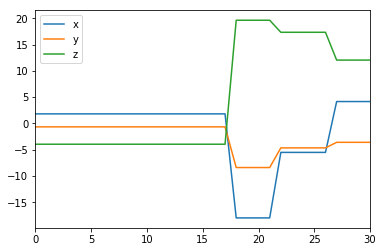

In [48]:
acel.plot()

Ahoa vamos a mejor nuestro codigo para tener lecturas entre caad incremento del tiempo y para que sea una funcion que podamos invocar cuando queramos

In [49]:
import pandas as pd
import time
%matplotlib inline

def capturaDatosAceleracion():
    """
            Una funcion simple que registra lecturas del acelerometro y las
            guarda en un DataFrame de pandas
    """
    aceleracion = []
    tiempoCensado = 0.
    tiempoTotal = 3000

    droide.startSensingTimed(2,100)
    
    while tiempoCensado <= tiempoTotal:
        aceleracion.append(droide.sensorsReadAccelerometer().result)
        time.sleep(100/1000.00)
        tiempoCensado += 100
    droide.stopSensing();
    
    return pd.DataFrame(aceleracion, columns=["Ax","Ay","Az"])

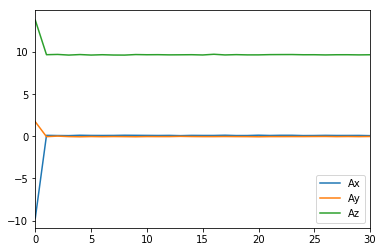

In [52]:
acel=capturaDatosAceleracion()
acel.plot()